# Name: Hanan Fared Mohamed Omara , ID =  20398559

# Data Science LifeCycle 🤓
- Business Understanding 
 - the dataset combined with some available data. Some nosies are added to the dataset and is not clean so we need to clean it well , The goal is to predict which better match people in speed dating events. We did have another online dating dataset (Tinder-like) but that one is super dirty which requires extensive cleaning, so we do this one instead. This is a binary classification task. we are going to predict the probability (0-1, float) that the dating session will lead to a successful match.
- Load Dataset 😃
  - The dataset is (Tinder-like) dataset.
  - Dataset on kaggle include two parts (train dataset,test dataset)
- Data Preprataion 🧐
  - Check duplication
  - Check null
  - check unique
-Feature Engineering
-Modeling
  - do different models at least 6 times using
    - one grid search trial
    - one random search trial
    - one bayesian search trial
- Model Evaluation 🥳      
  - Evalute on training dataset and on validation dataset
  




## Define the problem. What is the input? What is the output?
- The goal of the problem is to predict which better match people in speed dating events.based on other features of the people. The input is the various features of partners such as gender, position,salary,wave,round,order and 
Others The output is the predicted column called `match`, which is binary 0 or 1 as 0 means not matched and 1 means match. The goal is to estimate how
these partners match together.


## What data mining function is required?
- The data mining function required is classification since the goal is to predict the matching of people.


## What could be the challenges? 🤯
- The challenges could include dealing with noisy data, missing values, and irrelevant or unnecessary features.
 Also, the features included in the dataset may not be sufficient to accurately predict the product rating, which may require additional data sources or feature engineering.

## What is the impact?
- The impact of accurately predicting matching is that it can help people to know if this partner is goog and match with them or not .
 



## What is an ideal solution? 🤔
- My experiment tries to reach to the highest accuracy to predict correct and gives the best benefits to people, in general, an ideal solution would be to develop a machine learning model that accurately predicts 
the matching  based on the available features, while also being able to handle missing or noisy data. The model should also be easily interpretable, so that businesses can understand the factors that are most important for predicting product ratings. Additionally, the model should be regularly updated with new data to ensure its accuracy over time and develope it regulary.


##Import Libraries

In [ ]:
#import all the important libraries which we need in our experiment.
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score 
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost.sklearn import XGBClassifier


## Load dataset

In [ ]:
#load the train and test dataset to our notebook
train_df = pd.read_csv('/content/train_kaggle.csv')
test_df = pd.read_csv('/content/test_kaggle.csv')

## preparation of train set

In [ ]:
#make a variable hold the values of id from test dataset
match=train_df["match"]

In [ ]:
#check the type of train data
train_df['match'].dtype

dtype('int64')

In [ ]:
#check the shape of train dataset
train_df.shape

(5909, 192)

In [ ]:
test_df.shape

(2469, 191)

In [ ]:
# make a copy of dataset to can do different preprocessing on it
train_data = train_df.copy()


In [ ]:
#show the first 5 rows in data
train_data.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,8.0,8.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,9.0,8.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4828


- we note here, there are many missing values which contain` NaN` ,SO We will solve this problem later.
- also the data values don't have the same scale so we want to do ` Normalization ` to keep all values on the same scale from 0 to 1

In [ ]:
# describe the statistical of data
train_data.describe()


,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id
count,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,5909.000000,4591.000000,5909.00000,5909.000000,5901.000000,...,2804.000000,2804.000000,2804.000000,2804.000000,1413.000000,1413.000000,1413.000000,1413.000000,1413.000000,5909.000000
mean,0.505331,17.360298,1.824843,11.347436,16.850228,9.001523,9.254846,8.91166,8.962938,283.733266,...,8.105563,8.377318,7.644437,7.398716,6.799717,7.631989,7.944798,7.162774,7.092711,4191.314943
std,0.500014,10.947542,0.380133,6.011495,4.389246,5.482368,5.611803,5.45710,5.500706,158.993002,...,1.601011,1.459013,1.757559,1.956924,1.535768,1.498024,1.320919,1.687431,1.713729,2408.009173
min,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000,0.000000
25%,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.00000,4.000000,153.000000,...,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000,2124.000000
50%,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.00000,8.000000,280.000000,...,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000,4210.000000
75%,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.00000,13.000000,409.000000,...,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000,6266.000000
max,1.000000,44.000000,2.000000,21.000000,22.000000,22.000000,22.000000,22.00000,22.000000,552.000000,...,12.000000,12.000000,12.000000,12.000000,10.000000,10.000000,10.000000,10.000000,10.000000,8372.000000


- from this describe we note that, mean not equal zero and sandard deivation not equal 1 .so we will this problem with applying `Standardization`.

### check duplication


In [ ]:
#for train we find there is no duplicated rows
duplicated= train_data[train_data.duplicated()]
duplicated


,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,id


### check Null

In [ ]:
#check the null cells in train data
train_data.isnull().sum()

gender         0
idg            0
condtn         0
wave           0
round          0
            ... 
sinc5_3     4496
intel5_3    4496
fun5_3      4496
amb5_3      4496
id             0
Length: 192, dtype: int64

In [ ]:
# anything missing?
total=train_data[:20].isnull().sum().sort_values(ascending=False)
total

num_in_3    19
numdat_3    18
intel7_2    17
fun7_2      17
shar7_3     17
            ..
yoga         0
exphappy     0
attr1_1      0
sinc1_1      0
id           0
Length: 192, dtype: int64

In [ ]:
# anything missing?
total=train_data[:20:50].isnull().sum().sort_values(ascending=False)
total

shar        1
fun1_s      1
fun1_3      1
intel1_3    1
attr1_3     1
           ..
intel1_1    0
fun1_1      0
amb1_1      0
shar1_1     0
id          0
Length: 192, dtype: int64

In [ ]:
# missing values percentage per-column
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
percent

num_in_3    0.922153
numdat_3    0.820613
expnum      0.783043
amb7_2      0.764766
sinc7_2     0.764766
              ...   
position    0.000000
round       0.000000
wave        0.000000
condtn      0.000000
id          0.000000
Length: 192, dtype: float64

,Total,Percent
shar,1,0.128956
fun1_s,1,0.506685
fun1_3,1,0.525470
intel1_3,1,0.525470
attr1_3,1,0.525470
...,...,...
intel1_1,0,0.009816
fun1_1,0,0.011000
amb1_1,0,0.012016
shar1_1,0,0.014893


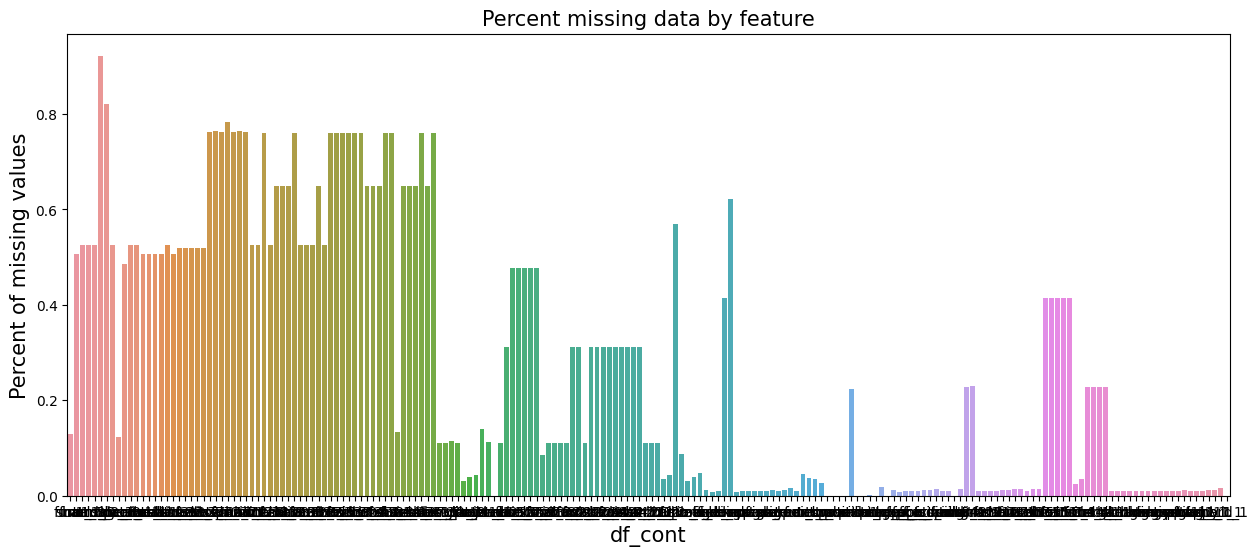

In [ ]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='horizontal')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('df_cont', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Columns: 192 entries, gender to id
dtypes: float64(173), int64(11), object(8)
memory usage: 8.7+ MB


### check unique data

In [ ]:
def check_unique(df):
  ls=[]
  for col in df.columns:
    n=df[col].nunique()
    if n==1: ls.append(col)
    elif  n>100 and df[col].dtypes == object:
      ls.append(col)
  return ls

In [ ]:
#for train 
drop_column=check_unique(train_data)
drop_column


['field', 'undergra', 'tuition', 'from', 'zipcode', 'income', 'career']

In [ ]:
# make a a list of different columns which we see useless
dropped=['mn_sat','tuition','zipcode','undergra','expnum','attr1_s','sinc1_s','intel1_s','fun1_s',
         'amb1_s','shar1_s','attr3_s','sinc3_s','intel3_s','fun3_s','amb3_s','attr7_2','sinc7_2',
         'intel7_2','fun7_2','amb7_2','shar7_2','them_cal','date_3','numdat_3','num_in_3','attr1_3',
         'sinc1_3','intel1_3','fun1_3','amb1_3','shar1_3','attr7_3','sinc7_3','intel7_3','fun7_3',
         'amb7_3','shar7_3','attr4_3','sinc4_3','intel4_3','fun4_3','amb4_3','shar4_3','attr2_3',
         'sinc2_3','intel2_3','fun2_3','amb2_3','shar2_3','attr3_3','sinc3_3','intel3_3','fun3_3',
         'amb3_3','attr5_3','sinc5_3','intel5_3','fun5_3','amb5_3']
train_data.drop(dropped, axis=1, inplace=True)

In [ ]:
#drop the target column
train_data.drop('match', axis=1, inplace=True)

In [ ]:
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
percent

you_call    0.525470
income      0.484346
amb5_2      0.477407
fun5_2      0.477407
intel5_2    0.477407
              ...   
position    0.000000
round       0.000000
wave        0.000000
condtn      0.000000
id          0.000000
Length: 131, dtype: float64

In [ ]:
train_data.drop(['you_call','amb5_2','fun5_2','intel5_2'], axis=1, inplace=True)

In [ ]:
percent = (train_data.isnull().sum()/train_data.isnull().count()).sort_values(ascending=False)
percent

income      0.484346
sinc5_2     0.477407
attr5_2     0.477407
amb5_1      0.414960
fun5_1      0.414960
              ...   
position    0.000000
round       0.000000
wave        0.000000
condtn      0.000000
id          0.000000
Length: 127, dtype: float64

In [ ]:
# show the head of datato understand it well 
train_data.head()

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,id
0,0,3,2,14,18,2,2.0,14,12,372.0,...,0.00,0.00,10.0,10.0,10.0,9.0,10.0,10.0,9.0,2583
1,1,14,1,3,10,2,NaN,8,8,63.0,...,NaN,NaN,6.0,7.0,7.0,7.0,8.0,NaN,NaN,6830
2,1,14,1,13,10,8,8.0,10,10,331.0,...,15.00,10.00,7.0,9.0,9.0,8.0,10.0,7.0,9.0,4840
3,1,38,2,9,20,18,13.0,6,7,200.0,...,17.02,12.77,8.0,9.0,8.0,8.0,7.0,NaN,NaN,5508
4,1,24,2,14,20,6,6.0,20,17,357.0,...,20.00,10.00,7.0,8.0,9.0,9.0,8.0,7.0,7.0,4828


In [ ]:
#check the shape
train_data.shape

(5909, 127)

## Data cleaning 🧹

In [ ]:
# check the correlation between all features to benefits of it if there is any high correlation between features
corr = train_data.corr()
corr

,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,...,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,id
gender,1.000000,0.032132,-0.000875,-0.004192,0.017755,-0.004047,0.000410,0.009850,0.010318,-0.056275,...,0.363901,-0.169447,-0.083599,-0.140321,0.095417,-0.116650,-0.007924,-0.001287,-0.178150,0.006340
idg,0.032132,1.000000,0.330587,0.093823,0.391918,0.164705,0.174651,0.161976,0.139034,0.088372,...,-0.039150,0.016351,-0.013440,0.009154,-0.005050,0.008124,0.039601,-0.021981,-0.061233,-0.036693
condtn,-0.000875,0.330587,1.000000,0.219735,0.820898,0.331013,0.306722,0.331402,0.322467,0.218009,...,-0.035504,0.032716,0.011033,0.043116,0.049328,0.008403,0.040339,-0.000160,-0.042388,-0.044675
wave,-0.004192,0.093823,0.219735,1.000000,0.228917,0.079820,0.061166,0.093478,0.087904,0.996714,...,-0.310607,-0.231347,0.008712,0.030243,-0.005593,0.070527,0.091290,-0.048536,-0.072139,-0.001863
round,0.017755,0.391918,0.820898,0.228917,1.000000,0.380632,0.368352,0.397952,0.390320,0.218901,...,-0.070813,0.035671,0.036352,0.012534,0.057628,0.003904,0.054940,0.017414,-0.069566,-0.029700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fun3_2,-0.116650,0.008124,0.008403,0.070527,0.003904,-0.050530,-0.076781,-0.022651,-0.001706,0.077710,...,-0.074894,-0.077963,0.447901,0.286365,0.328200,1.000000,0.354353,0.417500,0.357390,-0.016433
amb3_2,-0.007924,0.039601,0.040339,0.091290,0.054940,0.077231,-0.001756,0.016422,0.018675,0.090609,...,-0.039334,-0.079089,0.330028,0.220786,0.393804,0.354353,1.000000,0.195820,0.173968,-0.004165
attr5_2,-0.001287,-0.021981,-0.000160,-0.048536,0.017414,-0.039660,-0.037168,0.011537,-0.005290,-0.052292,...,-0.099667,0.002513,0.849260,0.213589,0.300626,0.417500,0.195820,1.000000,0.266563,-0.018410
sinc5_2,-0.178150,-0.061233,-0.042388,-0.072139,-0.069566,-0.063697,-0.138315,-0.043010,-0.030502,-0.052526,...,-0.094171,0.024966,0.221485,0.647121,0.378100,0.357390,0.173968,0.266563,1.000000,0.004089


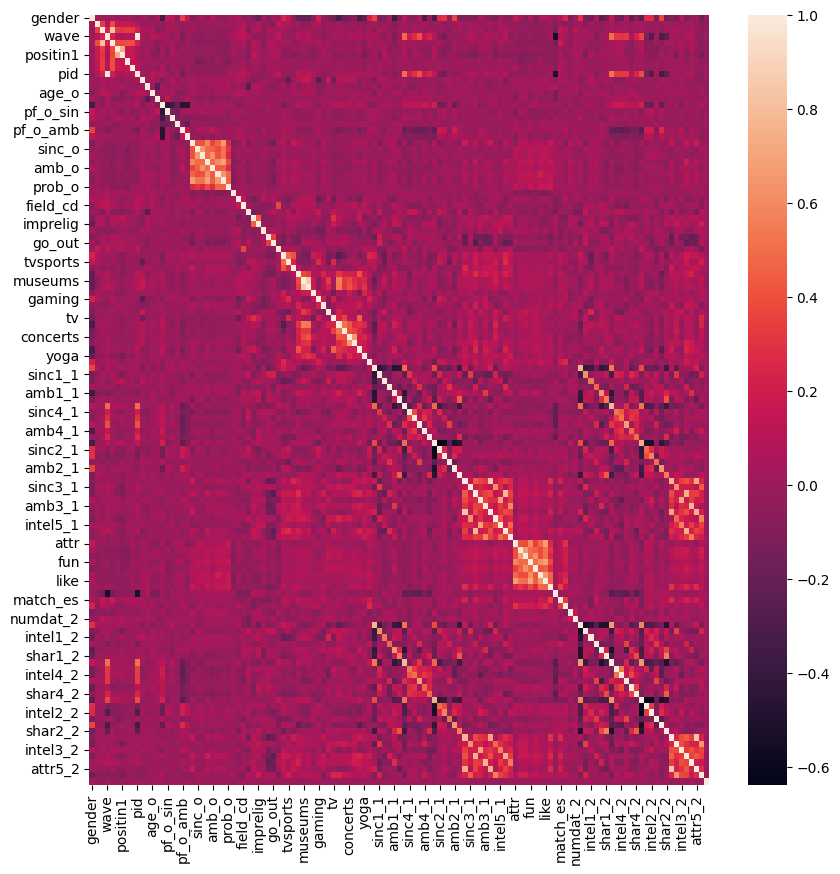

In [ ]:
# setting the dimensions of the plot
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 10))
# drawing the plot
sns.heatmap(corr)
plt.show()

### A Tunable Pipeline
In fact, any preprocessing steps can be considered as part of model and different configurations for these steps can be tunable. We can combine preprocessing steps and model as a single tunable pipeline with hyper-parameters.




In [ ]:
# we extract numeric features and categorical features names
# for later use

# numeric features can be selected by: (based on the train_data.info() output )
features_numeric = list(train_data.select_dtypes(include=['float64', 'int64']))

# categorical features can be selected by: (based on the train_data.info() output )
features_categorical = list(train_data.select_dtypes(include=['object']))

print('numeric features:', features_numeric)
print('categorical features:', features_categorical)

numeric features: ['gender', 'idg', 'condtn', 'wave', 'round', 'position', 'positin1', 'order', 'partner', 'pid', 'int_corr', 'samerace', 'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun', 'pf_o_amb', 'pf_o_sha', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field_cd', 'race', 'imprace', 'imprelig', 'goal', 'date', 'go_out', 'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1', 'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1', 'amb2_1', 'shar2_1', 'attr3_1', 'sinc3_1', 'fun3_1', 'intel3_1', 'amb3_1', 'attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1', 'attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob', 'met', 'match_es', 'satis_2', 'length', 'num

In [ ]:
np.random.seed(0)

# define a pipe line for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)
xgb = XGBClassifier(#silent=False, 
                      scale_pos_weight=1, 
                      colsample_bytree = 0.4,
                      learning_rate=0.01,
                       max_depth=10,
                      n_estimators=800,
                      subsample = 0.8,
                      objective='binary:logistic', 
                      reg_alpha = 0)



# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', xgb
        )
    ]
)
full_pipline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf_o_sha', 'attr_o',
                                                   'sinc...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.01,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=10, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=800,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
X=train_data
y=match

In [ ]:
X_train, X_VAL, y_train, y_VAL = train_test_split(X, y, test_size=0.2, random_state=2)

In [ ]:
y_train.shape

(4727,)

In [ ]:
# The pipeline object can be used like any sk-learn model
full_pipline = full_pipline.fit(X_train, y_train)
OUT=full_pipline.predict(X_VAL)

In [ ]:
OUT[:100]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0])

## Grid Search with Cross-validation
We can tune the hyperparameters (including different preprocessing configurations using cross-validation and grid-search). Grid search tests all possible combination of hyperparameters by the options and ranges you specified.

## Trial 1

### first time to tune with `Grid Search` with xbg  model with hyperparameter
  - ' preprocessor__num__imputer__strategy '=mean
  -  ' my_classifier__n_estimators ':[20, 30, 60]
  - ' my_classifier__max_depth ': [10, 30, 60]

In [ ]:
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [20, 30, 60],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[10, 30, 60]       
}

# cv=10 means ten-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search = GridSearchCV(
    full_pipline, param_grid, cv=10, verbose=1, n_jobs=-1, 
    scoring='roc_auc')

grid_search.fit(X_train, y_train)

print('best score {}'.format(grid_search.best_score_))
print('best score {}'.format(grid_search.best_params_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
best score 0.8635642626344934
best score {'my_classifier__max_depth': 30, 'my_classifier__n_estimators': 60, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
# the resulting model is the same pipeline with the best hyperparameters
# trained on the full training set. we can use it directly
grid_search.predict(X_VAL)

array([0, 0, 0, ..., 0, 0, 0])

## Trial 2

### Second time(trial) to tune with `Grid Search` with xgb model with different hyperparameter
  - ' preprocessor__num__imputer__strategy '=mean
  -  ' my_classifier__n_estimators ':[700, 900, 1000]
  - ' my_classifier__max_depth ': [5, 8, 10]

In [ ]:
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [1000, 1500, 2000],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[5, 8, 10]       
}

# cv=10 means ten-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search_second = GridSearchCV(
    full_pipline, param_grid, cv=10, verbose=1, n_jobs=-1, 
    scoring='roc_auc')

grid_search_second.fit(X_train, y_train)

print('best score {}'.format(grid_search_second.best_score_))
print('best score {}'.format(grid_search_second.best_params_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
best score 0.8842139590581407
best score {'my_classifier__max_depth': 8, 'my_classifier__n_estimators': 1500, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
# the resulting model is the same pipeline with the best hyperparameters
# trained on the full training set. we can use it directly
grid_search_second.predict(X_VAL)

array([0, 0, 0, ..., 0, 0, 0])

### Decision tree

In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier

np.random.seed(0)

# define a pipe line for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)

# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline_dt= Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', DecisionTreeClassifier()
        )
    ]
)
full_pipline_dt

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf_o_sha', 'attr_o',
                                                   'sinc...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.02,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=13, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=600,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [600, 800, 200],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[5, 8, 10]       
}

# cv=10 means ten-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search_dt = GridSearchCV(
    full_pipline_dt, param_grid, cv=10, verbose=1, n_jobs=-1, 
    scoring='roc_auc')

grid_search_dt.fit(X_train, y_train)

print('best score {}'.format(grid_search_dt.best_score_))
print('best score {}'.format(grid_search_dt.best_params_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
best score 0.8775470518900448
best score {'my_classifier__max_depth': 8, 'my_classifier__n_estimators': 200, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
# the resulting model is the same pipeline with the best hyperparameters
# trained on the full training set. we can use it directly
grid_search_dt.predict(X_VAL)

## Trial 3

### Third time(trial) to tune with Grid Search with RandomForestClassifier model with different hyperparameter
- ' preprocessor__num__imputer__strategy '=mean
- ' my_classifier__n_estimators ':[60, 80, 100]
- ' my_classifier__max_depth ': [5, 8, 10]

In [ ]:
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from xgboost.sklearn import XGBClassifier

np.random.seed(0)

# define a pipe line for numeric feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_numeric = Pipeline(
    steps=[
        ('imputer', SimpleImputer()),
        ('scaler', StandardScaler())]
)

# define a pipe line for categorical feature preprocessing
# we gave them a name so we can set their hyperparameters
transformer_categorical = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant')),
        ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ]
)
# define the preprocessor 
# we gave them a name so we can set their hyperparameters
# we also specify what are the categorical 
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numeric, features_numeric),
        ('cat', transformer_categorical, features_categorical)
    ]
)

# combine the preprocessor with the model as a full tunable pipeline
# we gave them a name so we can set their hyperparameters
full_pipline_2 = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_classifier', RandomForestClassifier()
        )
    ]
)
full_pipline_2

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['gender', 'idg', 'condtn',
                                                   'wave', 'round', 'position',
                                                   'positin1', 'order',
                                                   'partner', 'pid', 'int_corr',
                                                   'samerace', 'age_o',
                                                   'race_o', 'pf_o_att',
                                                   'pf_o_sin', 'pf_o_int',
                                                   'pf_o_fun', 'pf_o_amb',
                                                   'pf_o_sha', 'attr_o',
                                                   'sinc...
                               feature_types=None, gamma=None, gpu_id=None,
                               grow_policy=None, importance_type=None,
                               interaction_constraints=None, learning_rate=0.02,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=13, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, n_estimators=600,
                               n_jobs=None, num_parallel_tree=None,
                               predictor=None, random_state=None, ...))])

In [ ]:
# here we specify the search space
# `__` denotes an attribute of the preceeding name
# (e.g. my_classifier__n_estimators means the `n_estimators` param for `my_classifier`)
param_grid = {
    'preprocessor__num__imputer__strategy': ['mean'],
    # preprocessor__num__imputer__strategy points to preprocessor->num (a Pipeline)-> imputer -> strategy
    'my_classifier__n_estimators': [600, 800, 200],  
     # my_classifier__n_estimators points to my_classifier->n_estimators 
    'my_classifier__max_depth':[5, 8, 10]       
}

# cv=10 means ten-fold cross-validation
# n_jobs means the cucurrent number of jobs
# (on colab since we only have two cpu cores, we set it to 2)
grid_search_third = GridSearchCV(
    full_pipline_2, param_grid, cv=10, verbose=1, n_jobs=-1, 
    scoring='roc_auc')

grid_search_third.fit(X_train, y_train)

print('best score {}'.format(grid_search_third.best_score_))
print('best score {}'.format(grid_search_third.best_params_))

Fitting 10 folds for each of 9 candidates, totalling 90 fits
best score 0.8775470518900448
best score {'my_classifier__max_depth': 8, 'my_classifier__n_estimators': 200, 'preprocessor__num__imputer__strategy': 'mean'}


In [ ]:
# the resulting model is the same pipeline with the best hyperparameters
# trained on the full training set. we can use it directly
grid_search_third.predict(X_VAL)

## Random Search 

Grid search (global optimal) is expensive when you specify a large search space. Alternatively, random search CV give you local optimal (may be good enough and even more generalizable)

## Trial 4

### FOUR Trial to tune with Random Search with RandomForestClassifier model with different hyperparameter
- ' preprocessor__num__imputer__strategy '=mean
- ' my_classifier__n_estimators ':[600, 800, 100]
- ' my_classifier__max_depth ': [5, 8, 10]

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit

random_search = RandomizedSearchCV(
    full_pipline_2, param_grid, cv=10, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=20,
    scoring='roc_auc')

random_search.fit(X_train, y_train)

print('best score {}'.format(random_search.best_score_))
print('best score {}'.format(random_search.best_params_))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 9 candidates, totalling 90 fits
best score 0.8612595731711583
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 50, 'my_classifier__max_depth': 40}


In [ ]:
# the resulting model is the same pipeline with the best hyperparameters
# trained on the full training set. we can use it directly
grid_search_third.predict(X_VAL)

## Trial 5

### Five Trial to tune with Random Search with xbg model with different hyperparameter

In [ ]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.model_selection import PredefinedSplit

random_search_second= RandomizedSearchCV(
    full_pipline, param_grid, cv=10, verbose=1, n_jobs=2, 
    # number of random trials
    n_iter=20,
    scoring='roc_auc')

random_search_second.fit(X_train, y_train)

print('best score {}'.format(random_search_second.best_score_))
print('best score {}'.format(random_search_second.best_params_))

/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 9 candidates, totalling 90 fits
best score 0.8612595731711583
best score {'preprocessor__num__imputer__strategy': 'mean', 'my_classifier__n_estimators': 50, 'my_classifier__max_depth': 40}


## Bayesian Search

We can interpret the hyperparameter search problem as a non-differentiable optimization problem, and use bayesian learning to predict what is the next hyperparamter values we should try given the current trials. 


## Trial 6

####  The Six Trial to tune with Bayesian Search with svc model

In [ ]:
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 KB 3.9 MB/s eta 0:00:00


In [ ]:
# Let's try this with SVM model
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.svm import SVC


SVC_pipline = Pipeline(
    steps=[
        ('preprocessor', preprocessor),
        ('my_svc', SVC(class_weight='balanced'))
    ]
)
# SVC has a class_weight attribute for unbalanced data


# define ranges for bayes search
bayes_search = BayesSearchCV(
    SVC_pipline,
    {
        'my_svc__C': Real(1e-6, 1e+6, prior='log-uniform'),
        'my_svc__gamma': Real(1e-6, 1e+1, prior='log-uniform'),
        'my_svc__degree': Integer(1,8),
        'my_svc__kernel': Categorical(['linear', 'poly', 'rbf']),
    },
    # number of trials 
    n_iter=3,
    random_state=0,
    verbose=1,
    # we still use 
    cv=15,
)

bayes_search.fit(X_train, y_train)

print('best score {}'.format(bayes_search.best_score_))
print('best score {}'.format(bayes_search.best_params_))


Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
Fitting 15 folds for each of 1 candidates, totalling 15 fits
best score 0.830133279753533
best score OrderedDict([('my_svc__C', 0.0012602593949011189), ('my_svc__degree', 8), ('my_svc__gamma', 2.285959941576884), ('my_svc__kernel', 'poly')])


In [ ]:
# the resulting model is the same pipeline with the best hyperparameters
# trained on the full training set. we can use it directly
bayes_search.predict(X_VAL)

NameError: ignored

In [ ]:
X.isnull().sum()

gender         0
idg            0
condtn         0
wave           0
round          0
            ... 
intel5_2    2821
fun5_2      2821
amb5_2      2821
you_call    3105
id             0
Length: 131, dtype: int64

##  Submission Result

In [ ]:
submission = pd.DataFrame()

submission['id'] = test_df['id']

submission['match'] = grid_search_second.predict_proba(test_df)[:,1]

submission.to_csv('sample_submission_walkthrough.csv', index=False)
print("Submission was saved successfully")

Submission was saved successfully


In [ ]:
test_df.id

0        934
1       6539
2       6757
3       2275
4       1052
        ... 
2464    7982
2465    7299
2466    1818
2467     937
2468    6691
Name: id, Length: 2469, dtype: int64

# Questions and their answers

## Why a simple linear regression model (without any activation function) is not good for classification task, compared to Perceptron/Logistic regression?
- There are two things that explain why Linear Regression is not suitable for classification. 
  - The first one is that Linear Regression deals with continuous values whereas classification problems mandate discrete values. 
  - The second problem is regarding the shift in threshold value when new data points are added.
- A simple linear regression model is not suitable for classification tasks because it does not produce binary outputs. Linear regression models predict continuous numerical values, while classification tasks require binary outputs that represent class labels or probabilities.

- Perceptron and logistic regression models, on the other hand, are specifically designed for binary classification tasks. They use activation functions, such as the step function or sigmoid function, to produce binary outputs based on the input features.

- The step function used in the Perceptron model produces a binary output of 1 or -1, depending on whether the input falls above or below a threshold value. The sigmoid function used in logistic regression produces a binary output between 0 and 1, which can be interpreted as the probability of belonging to a certain class.

- In summary, a simple linear regression model is not suitable for classification tasks because it does not produce binary outputs. Perceptron and logistic regression models are specifically designed for binary classification tasks and use activation functions to produce binary outputs based on the input features.


## What's a decision tree and how it is different to a logistic regression model?
- Logistic Regression and trees differ in the way that they generate decision boundaries.
- Decision Trees bisect the space into smaller and smaller regions, whereas Logistic Regression fits a single line to divide the space exactly into two.
- When it comes to prediction accuracy, Logistic Regression is typically superior.
- A decision tree is a type of supervised learning algorithm that is used for classification and regression tasks. It works by recursively splitting the data into subsets based on the values of input features, with the goal of separating the data into homogeneous groups with respect to the output variable.

- The decision tree starts with a root node that represents the entire dataset, and then splits the data into subsets based on the values of a chosen feature. Each subset is then recursively split until a stopping criterion is met, such as reaching a maximum depth or a minimum number of samples per leaf.

- The resulting tree structure can be used to make predictions for new data by traversing the tree from the root to a leaf node, and outputting the corresponding prediction.

- Logistic regression, on the other hand, is a statistical model used for binary or multiclass classification tasks. It works by modeling the probability of a binary or categorical output variable as a function of one or more input variables.

- The logistic regression model estimates the coefficients of the input variables and uses them to compute a linear combination of the input variables, which is then transformed using the logistic function to obtain the predicted probability of the output variable.

- The main difference between decision trees and logistic regression models is that decision trees recursively partition the feature space into subregions, while logistic regression models estimate a linear decision boundary that separates the feature space into two regions.

- In summary, decision trees and logistic regression models are both supervised learning algorithms used for classification tasks. Decision trees recursively partition the feature space into subregions, while logistic regression models estimate a linear decision boundary. The choice between the two techniques depends on the specific task and the characteristics of the data.

## What's the difference between grid search and random search?
- grid search looks at every possible combination of hyperparameters to find the best model, random search only selects and tests a random combination of hyperparameters.
- Grid search and random search are two common techniques used for hyperparameter tuning in machine learning.

- Grid search involves specifying a grid of hyperparameter values to search over. The search algorithm then evaluates the model performance for each combination of hyperparameters in the grid, and returns the combination with the best performance. This approach systematically explores the entire search space, but it can be computationally expensive, especially when the search space is large.

- Random search, on the other hand, involves randomly sampling hyperparameter values from a predefined search space. The search algorithm then evaluates the model performance for each combination of hyperparameters, and returns the combination with the best performance. This approach does not explore the entire search space systematically, but it can be more computationally efficient than grid search, especially when the search space is large.

- In summary, grid search and random search are both techniques used for hyperparameter tuning in machine learning. Grid search systematically explores the entire search space, while random search randomly samples from the search space. Grid search can be computationally expensive, while random search can be more efficient. The choice between the two techniques depends on the specific task and the characteristics of the data.

## What's the difference between bayesian search and random search?
- Unlike the grid search and random search, which treat hyperparameter sets independently, the Bayesian optimization is an informed search method, meaning that it learns from previous iterations. The number of trials in this approach is determined by the user.
- the Bayesian optimization method can converge to the optimal hyperparameters. Thus, the best hyperparameters can be obtained without exploring the entire sample space.
- With the Bayesian optimization method, users do not have to endure long run times that come from evaluating every hyperparameter set. They also do not have to incorporate randomness and risk missing the optimal solution.
- The random search is also an uninformed search method that treats iterations independently.
- However, instead of searching for all hyperparameter sets in the search space, it evaluates a specific number of hyperparameter sets at random. This number is determined by the user.
- Since it performs fewer trials in hyperparameter tuning, the method requires less computation and run time than the grid search.
